In [1]:
import pandas as pd
import numpy as nd
from sklearn import tree

from matplotlib import pyplot as plt

from sklearn.tree import export_graphviz as graphview
from scipy import misc
import io
import pydotplus as pydot

In [2]:
df=pd.read_csv("sample.csv")
df.sample(5)

,PREGNANCIES,GLUCOSE,BLOOD PRESSURE,SKIN THIKNESS,INSULIN,BMI,DPF,AGE,Class
744,12,100,84,33,105,30.0,0.488,46,0
565,1,99,72,30,18,38.6,0.412,21,0
645,1,167,74,17,144,23.4,0.447,33,1
355,1,125,50,40,167,33.3,0.962,28,1
318,6,194,78,0,0,23.5,0.129,59,1


In [3]:
x=df.drop('Class',axis=1)
y=df['Class']

In [4]:
feature = ['PREGNANCIES','GLUCOSE','BLOOD PRESSURE','SKIN THIKNESS','INSULIN','BMI','DPF','AGE'
]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20)

In [6]:
clf = tree.DecisionTreeClassifier(min_samples_split = 50)

In [7]:
clf = clf.fit(x_train, y_train)

In [8]:
def tree_generate(tree, feature, path):
    f = io.StringIO()
    graphview(tree, out_file = f,feature_names = feature)
    pydot.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

C:\Users\Hasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


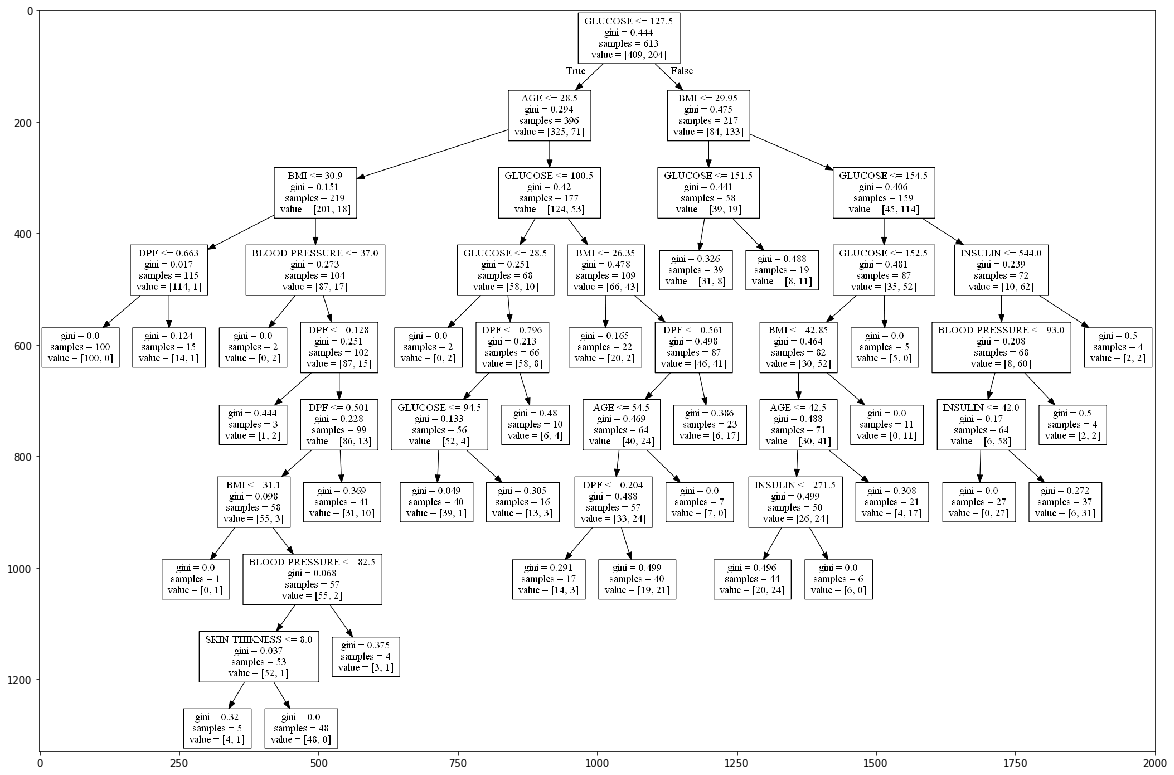

In [9]:
tree_generate(clf,feature,'tree.png')

In [10]:
predictions = clf.predict(x_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,predictions))

[[70 21]
 [17 46]]


In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.77      0.79        91
          1       0.69      0.73      0.71        63

avg / total       0.76      0.75      0.75       154



In [14]:
y_pred = clf.predict(x_test)

In [16]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy : ", round(score,1), "%")

Accuracy :  75.3 %
